## Import Dependencies

In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from citipy import citipy

#import API Key
from config import weather_api_key

#Output file CSV

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#create lists to hold lat_lng  and cities
lat_lngs = []
cities = []
countries = []

#create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#identify the nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    #if city is unique, add to list of cities
    if city not in cities:
        cities.append(city)
        countries.append(country)
#print the city and country count to confirm sufficient count
print(len(cities))
print(len(countries))

586
586


In [3]:
#create a dataframe to store data
city_weather = pd.DataFrame({
    'City': cities,
    'Cloudiness': "",
    'Country': countries,
    'Date': "",
    'Humidity': "",
    'Latitude': "",
    'Longitude': "",
    'Max Temp': "",
    'Windspeed': ""})
#view first 5 
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Windspeed
0,butaritari,,ki,,,,,,
1,mys shmidta,,ru,,,,,,
2,port alfred,,za,,,,,,
3,khatanga,,ru,,,,,,
4,georgetown,,sh,,,,,,


## API Calls


In [4]:
#create counters
record_count = 1
set_count = 1

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Create an empty list to hold the weather data
city_data = []
#print the beginning of logging
print('''------------------------
Beginning Data Retrieval
------------------------''')
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

------------------------
Beginning Data Retrieval
------------------------


In [5]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                  "Lat": city_lat,
                  "Lng": city_lng,
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print('''-----------------------------
      Data Retrieval Complete      
      -----------------------------''')

Processing Record 1 of Set 12 | butaritari
Processing Record 2 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 12 | port alfred
Processing Record 4 of Set 12 | khatanga
Processing Record 5 of Set 12 | georgetown
Processing Record 6 of Set 12 | yanchukan
City not found. Skipping...
Processing Record 7 of Set 12 | barrow
Processing Record 8 of Set 12 | cherskiy
Processing Record 9 of Set 12 | mar del plata
Processing Record 10 of Set 12 | kapaa
Processing Record 11 of Set 12 | yellowknife
Processing Record 12 of Set 12 | nome
Processing Record 13 of Set 12 | busselton
Processing Record 14 of Set 12 | souillac
Processing Record 15 of Set 12 | baraya
Processing Record 16 of Set 12 | jiddah
City not found. Skipping...
Processing Record 17 of Set 12 | ontario
Processing Record 18 of Set 12 | bluff
Processing Record 19 of Set 12 | victoria
Processing Record 20 of Set 12 | ilulissat
Processing Record 21 of Set 12 | kayerkan
Processing Record 22 of Set 12 | airai


Processing Record 34 of Set 15 | chuguyevka
Processing Record 35 of Set 15 | cayenne
Processing Record 36 of Set 15 | kavaratti
Processing Record 37 of Set 15 | sao joao da barra
Processing Record 38 of Set 15 | olafsvik
Processing Record 39 of Set 15 | mangan
Processing Record 40 of Set 15 | ciro marina
Processing Record 41 of Set 15 | jian
Processing Record 42 of Set 15 | egvekinot
Processing Record 43 of Set 15 | korla
Processing Record 44 of Set 15 | jamestown
Processing Record 45 of Set 15 | esmeraldas
Processing Record 46 of Set 15 | trinidad
Processing Record 47 of Set 15 | flinders
Processing Record 48 of Set 15 | tikhvin
Processing Record 49 of Set 15 | micheweni
Processing Record 50 of Set 15 | makubetsu
Processing Record 1 of Set 16 | ribeira grande
Processing Record 2 of Set 16 | novikovo
Processing Record 3 of Set 16 | cidreira
Processing Record 4 of Set 16 | ormara
Processing Record 5 of Set 16 | lorengau
Processing Record 6 of Set 16 | lodja
Processing Record 7 of Set 16

Processing Record 13 of Set 19 | skibbereen
Processing Record 14 of Set 19 | terekli-mekteb
Processing Record 15 of Set 19 | touros
Processing Record 16 of Set 19 | awjilah
Processing Record 17 of Set 19 | sardinia
Processing Record 18 of Set 19 | wembley
Processing Record 19 of Set 19 | beyneu
Processing Record 20 of Set 19 | da nang
Processing Record 21 of Set 19 | talara
Processing Record 22 of Set 19 | dwarka
Processing Record 23 of Set 19 | washington
Processing Record 24 of Set 19 | caravelas
Processing Record 25 of Set 19 | ancud
Processing Record 26 of Set 19 | alwar
Processing Record 27 of Set 19 | sistranda
Processing Record 28 of Set 19 | togur
Processing Record 29 of Set 19 | serravalle pistoiese
Processing Record 30 of Set 19 | colac
Processing Record 31 of Set 19 | sungai padi
Processing Record 32 of Set 19 | saqqez
Processing Record 33 of Set 19 | presidente medici
Processing Record 34 of Set 19 | sangin
Processing Record 35 of Set 19 | west wendover
Processing Record 36

Processing Record 49 of Set 22 | dzaoudzi
Processing Record 50 of Set 22 | minot
Processing Record 1 of Set 23 | natal
Processing Record 2 of Set 23 | bayir
Processing Record 3 of Set 23 | cianorte
Processing Record 4 of Set 23 | enid
Processing Record 5 of Set 23 | erzin
Processing Record 6 of Set 23 | galle
Processing Record 7 of Set 23 | namibe
Processing Record 8 of Set 23 | adre
Processing Record 9 of Set 23 | asosa
Processing Record 10 of Set 23 | iracoubo
Processing Record 11 of Set 23 | krasnoselkup
Processing Record 12 of Set 23 | vestmannaeyjar
Processing Record 13 of Set 23 | henties bay
Processing Record 14 of Set 23 | dakoro
Processing Record 15 of Set 23 | palmer
Processing Record 16 of Set 23 | rio gallegos
Processing Record 17 of Set 23 | karakendzha
City not found. Skipping...
Processing Record 18 of Set 23 | portland
Processing Record 19 of Set 23 | kuching
Processing Record 20 of Set 23 | rawson
Processing Record 21 of Set 23 | pahrump
Processing Record 22 of Set 23 

In [6]:
#convert array of dictionaries to pd df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.40,77,57,13.82,KI,2021-06-25 00:41:25
1,Port Alfred,-33.5906,26.8910,55.51,83,20,5.01,ZA,2021-06-25 00:41:26
2,Khatanga,71.9667,102.5000,57.52,54,100,9.66,RU,2021-06-25 00:41:26
3,Georgetown,5.4112,100.3354,78.89,93,20,3.00,MY,2021-06-25 00:39:52
4,Barrow,71.2906,-156.7887,41.02,75,90,10.36,US,2021-06-25 00:40:05
5,Cherskiy,68.7500,161.3000,62.55,39,100,13.31,RU,2021-06-25 00:41:27
6,Mar Del Plata,-38.0023,-57.5575,51.01,81,0,10.36,AR,2021-06-25 00:41:27
7,Kapaa,22.0752,-159.3190,86.32,70,20,3.00,US,2021-06-25 00:38:10
8,Yellowknife,62.4560,-114.3525,72.12,46,40,10.36,CA,2021-06-25 00:41:28
9,Nome,64.5011,-165.4064,55.99,76,90,9.22,US,2021-06-25 00:41:28


In [7]:
#reorder columns in df
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-06-25 00:41:25,3.0707,172.7902,82.40,77,57,13.82
1,Port Alfred,ZA,2021-06-25 00:41:26,-33.5906,26.8910,55.51,83,20,5.01
2,Khatanga,RU,2021-06-25 00:41:26,71.9667,102.5000,57.52,54,100,9.66
3,Georgetown,MY,2021-06-25 00:39:52,5.4112,100.3354,78.89,93,20,3.00
4,Barrow,US,2021-06-25 00:40:05,71.2906,-156.7887,41.02,75,90,10.36
...,...,...,...,...,...,...,...,...,...
525,Bloomfield,US,2021-06-25 00:44:33,40.8068,-74.1854,69.84,61,20,1.01
526,Kungurtug,RU,2021-06-25 00:44:34,50.5994,97.5228,64.40,27,51,2.64
527,Sitka,US,2021-06-25 00:44:34,57.0531,-135.3300,55.29,88,90,12.66
528,Baracoa,CU,2021-06-25 00:44:35,20.3467,-74.4958,78.89,84,100,8.86


In [8]:
#create output file (CSV)
output_data_file = "weather_data_cities.csv"
#export the city_data into a csv
city_data_df.to_csv('output_data_file', index=False, header=True)

## Plotting Data

In [9]:
#extract relevant fields from the df for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [10]:
#import time module
import time
#get today's date in seconds
today = time.strftime('%x')
today

'06/24/21'

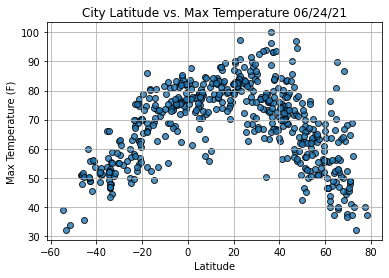

In [11]:
#import time
import time

#build the scatter plot for lat vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths=1, marker='o', alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data_Fig1.png")

#show plot
plt.show()

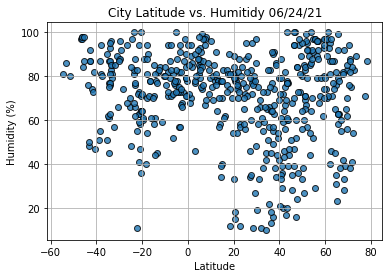

In [12]:
#Build scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Humitidy " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data_Fig2.png")

#show plot
plt.show()

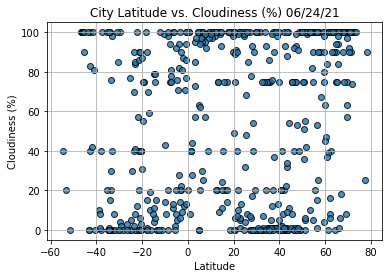

In [13]:
#Build scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data_Fig3.png")

#show plot
plt.show()

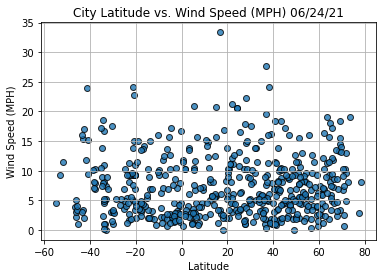

In [14]:
#Build scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (MPH) " + time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data_Fig4.png")

#show plot
plt.show()

In [15]:
#import linregress
from scipy.stats import linregress
#create a function to perform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
#create df from df using loc method
index13 = city_data_df.loc[13]
index13

City                      Ontario
Country                        US
Date          2021-06-25 00:39:09
Lat                       34.0633
Lng                      -117.651
Max Temp                    93.87
Humidity                       42
Cloudiness                     20
Wind Speed                   5.99
Name: 13, dtype: object

In [17]:
#display latitudes greater than or equal to 0 filter through city_data_df
city_data_df["Lat"]>=0
#return the data using loc method
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-06-25 00:41:25,3.0707,172.7902,82.40,77,57,13.82
2,Khatanga,RU,2021-06-25 00:41:26,71.9667,102.5000,57.52,54,100,9.66
3,Georgetown,MY,2021-06-25 00:39:52,5.4112,100.3354,78.89,93,20,3.00
4,Barrow,US,2021-06-25 00:40:05,71.2906,-156.7887,41.02,75,90,10.36
5,Cherskiy,RU,2021-06-25 00:41:27,68.7500,161.3000,62.55,39,100,13.31


In [18]:
#create norther and southern hemisphere df
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

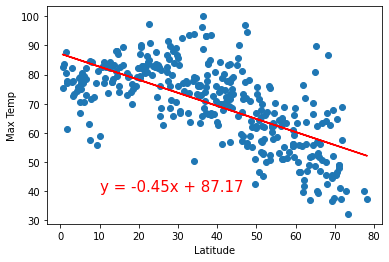

In [19]:
#linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (10,40))

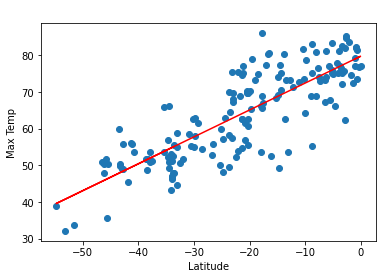

In [20]:
#linear regression on the northern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (-50,90))

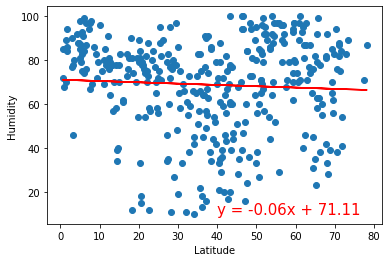

In [21]:
#linear regression on percent humidity of the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Northern Hemisphere \
                       for % Humidity', 'Humidity', (40, 10))

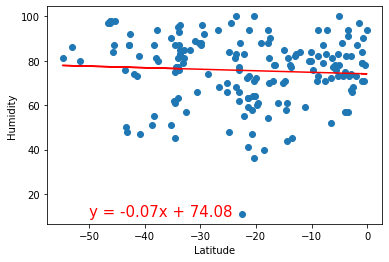

In [22]:
#linear regression on percent humidity of the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Southern Hemisphere \
                       for % Humidity', 'Humidity', (-50, 10))

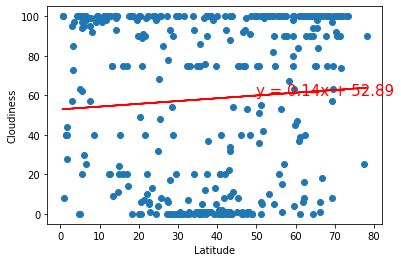

In [23]:
#linear regression on percent cloudiness of the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Northern Hemisphere \
                       for % Cloudiness', 'Cloudiness', (50, 60))

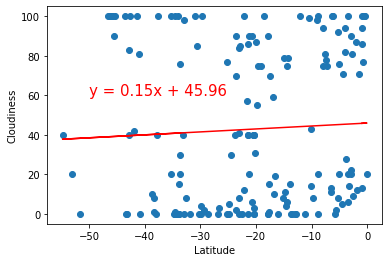

In [24]:
#linear regression on percent cloudiness of the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Southern Hemisphere \
                       for % Cloudiness', 'Cloudiness', (-50, 60))

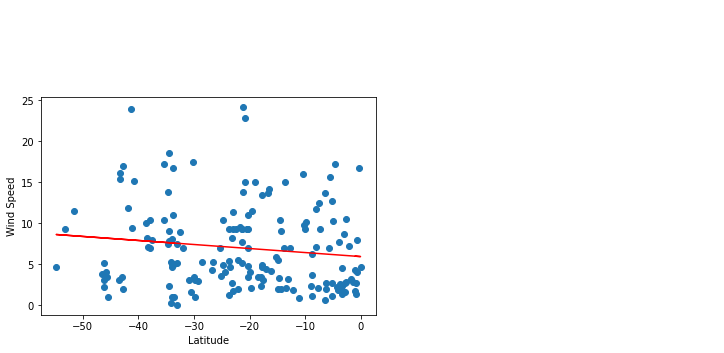

In [25]:
#linear regression on percent wind speed of the northern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Northern Hemisphere \
                       for Wind Speed (MPH)', 'Wind Speed', (40, 35))